## Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [4]:
pip install imblearn


     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 392.0 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
df=pd.read_csv('churn_dataset.csv')

## Understanding Data

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape

(7043, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### . TotalCharges should be in float

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Insights:

   .SeniorCitizen is categorical column.
   
   .32 is the avg tenure period of customers.

In [12]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.duplicated().sum()

0

 data is clean and there is not any duplicates.

### Converting TotalCharges into float

In [15]:
df.query('TotalCharges == " "')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


 As there are 11 rows with null values. First of all we need to fill these null values.

In [16]:
# calculating median of TotalCharges 
np.median(df.query('TotalCharges != " "')['TotalCharges'].astype('float'))

1397.475

In [17]:
df['TotalCharges']=df['TotalCharges'].replace(" ","1397.475")
df['TotalCharges']=df['TotalCharges'].astype('float')

In [18]:
df.drop("customerID",axis=1,inplace=True)

In [19]:
# converting senior citizen into category
df['SeniorCitizen'].replace({1:'Yes',0:'No'},inplace=True)

#### Data is cleaned

# Data Visualization

In [21]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### Churn column is imbalanced.

In [22]:
def plot_cat(feature):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    
    # As there are few columns with 2 uniques values, few with 3 unique values 
    # and one column with 4 unique values so to plot pie chart i have used if statement
    if df[feature].nunique() == 2 :
        a=df[feature].value_counts()[0]
        b=df[feature].value_counts()[1]
        c=df[feature].value_counts().index
        ax=plt.pie(x=[a,b],labels=c,autopct='%1.2f%%')
    elif df[feature].nunique() == 3 :
        a=df[feature].value_counts()[0]
        b=df[feature].value_counts()[1]
        c=df[feature].value_counts()[2]
        d=df[feature].value_counts().index
        ax=plt.pie(x=[a,b,c],labels=d,autopct='%1.2f%%')
    else:
        a=df[feature].value_counts()[0]
        b=df[feature].value_counts()[1]
        c=df[feature].value_counts()[2]
        d=df[feature].value_counts()[3]
        e=df[feature].value_counts().index
        ax=plt.pie(x=[a,b,c,d],labels=e,autopct='%1.2f%%')
        
        
    
    plt.subplot(1,2,2)
    ax=sns.countplot(x=df[feature],hue=df.Churn)
    plt.xticks(rotation=90)


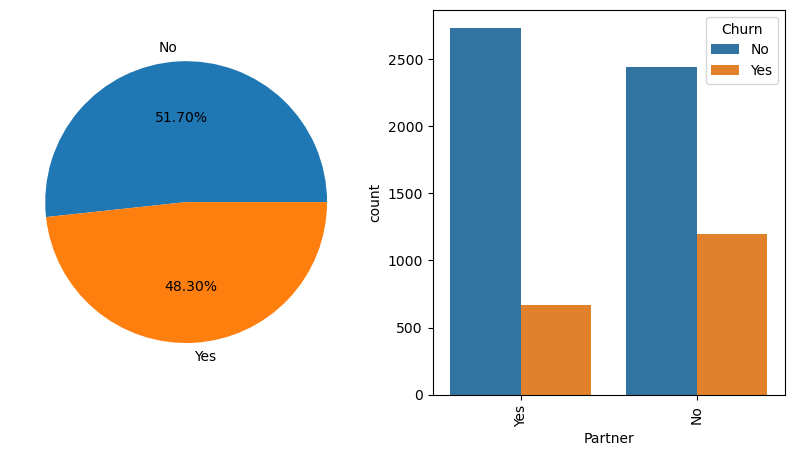

In [23]:
plot_cat('Partner')


#### Insights:
    .Distribution is almost equal but Those who don't have Partner are churning.

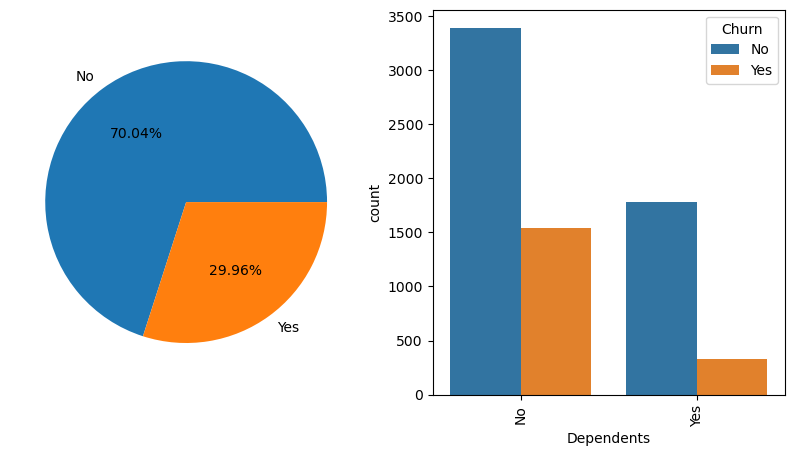

In [24]:
plot_cat('Dependents')

#### Insights:
   Most of the people are independant.
   
  independant people are churing more.

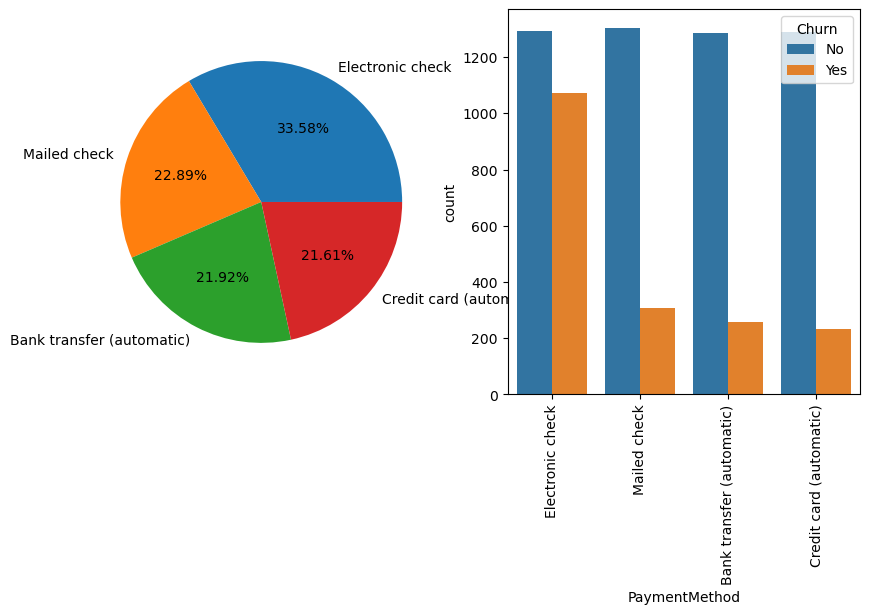

In [25]:
plot_cat('PaymentMethod')


#### Insights:
    People who are using electronic check are churning.

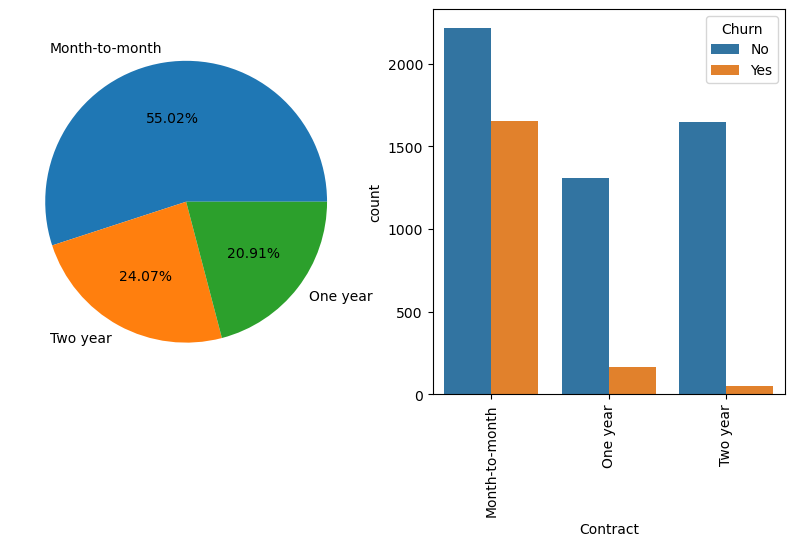

In [27]:
plot_cat('Contract')

#### Insights:
 Month-to-month contract type is famous amoung people.
 
 People who are having month-to-month contract are churning.

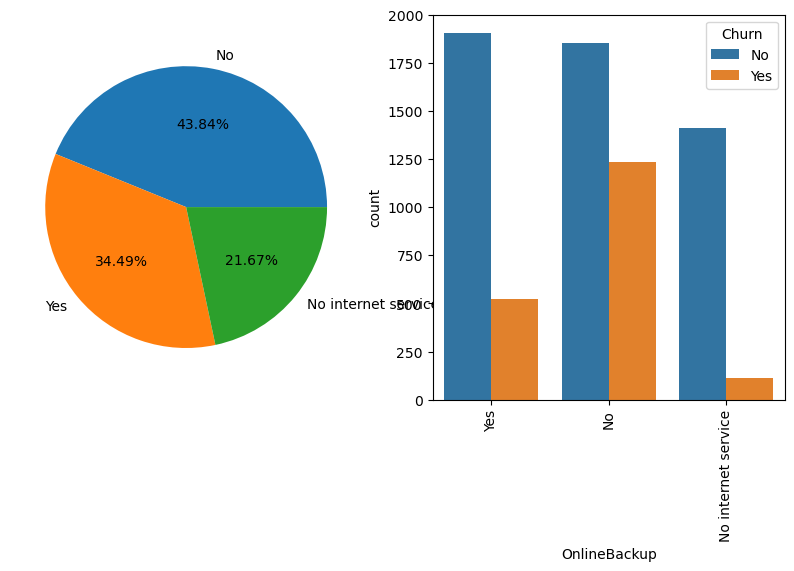

In [28]:
plot_cat('OnlineBackup')

#### Insights:
   .People without online backup are churning more.
   
   .Low churn can be seen without internet service.

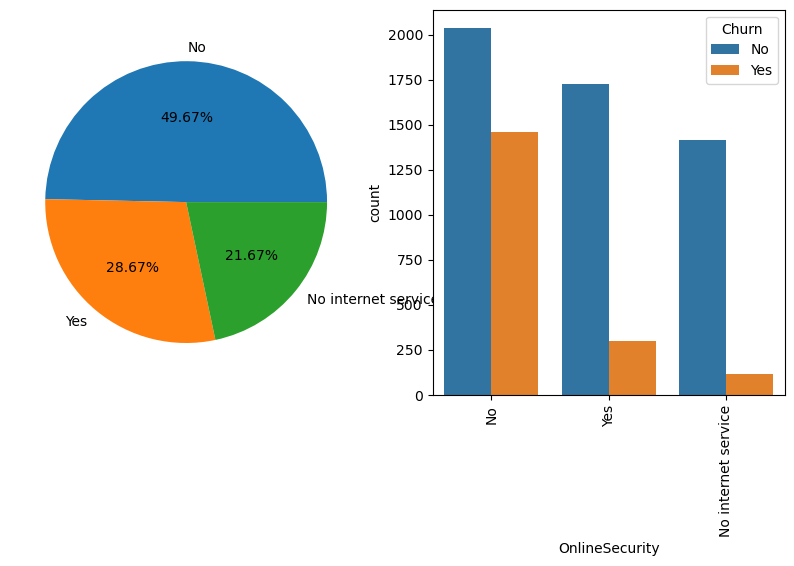

In [29]:
plot_cat('OnlineSecurity')

#### Insights:
   .People without online security are churning more.

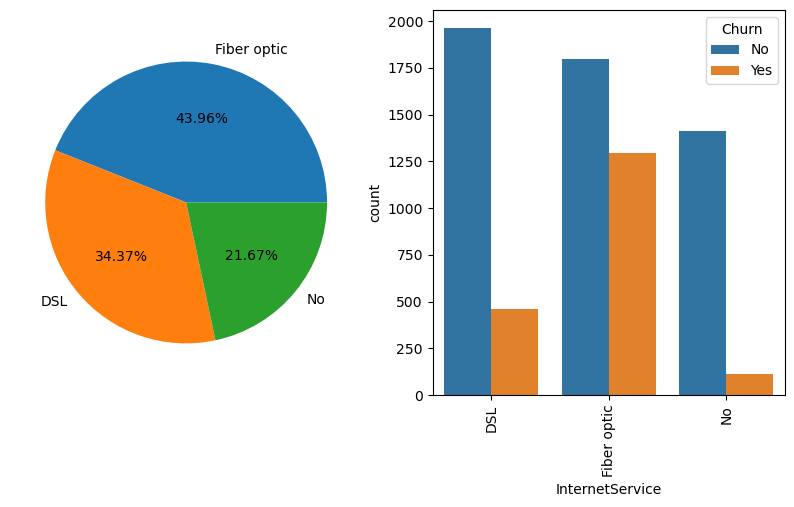

In [30]:
plot_cat('InternetService')

#### Insights:
People with Fiber optic internet service are churning more.

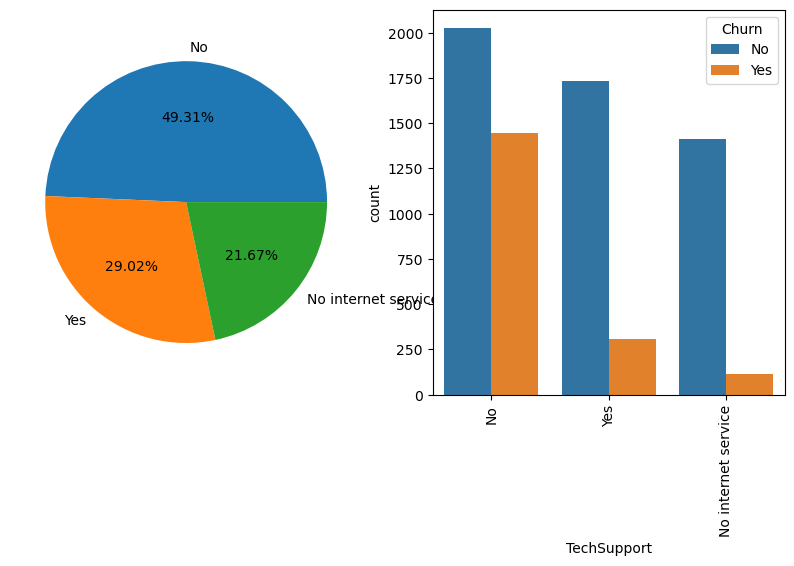

In [31]:
plot_cat('TechSupport')

#### Insights:
People with No Technical support are churning more.

People with No internet service are churning less.

In [32]:
def plot_num(feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(y=df[feature],x=df.Churn)
    plt.subplot(1,2,2)
    sns.histplot(x=df[feature],kde=True)

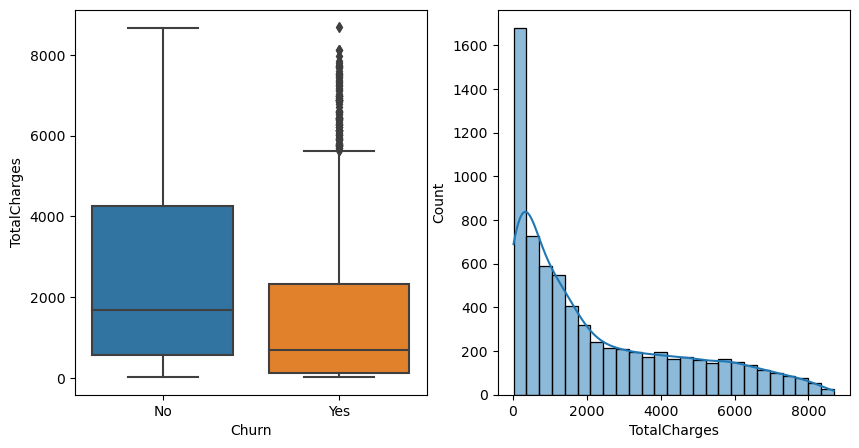

In [33]:
plot_num('TotalCharges')

#### Insights:
People with low total charges are churning more.

Total charges has positive skewness i.e 0.97

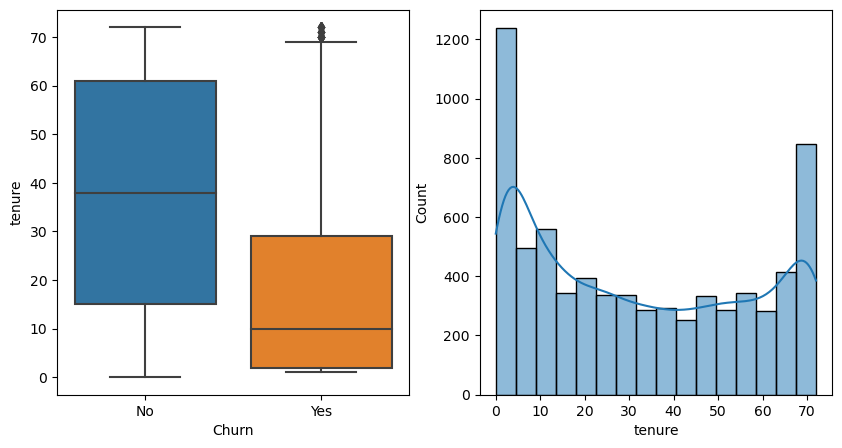

In [34]:
plot_num('tenure')

#### Insights:
We can create bins from tenure for better analysis.

People with less tenure period are churning.

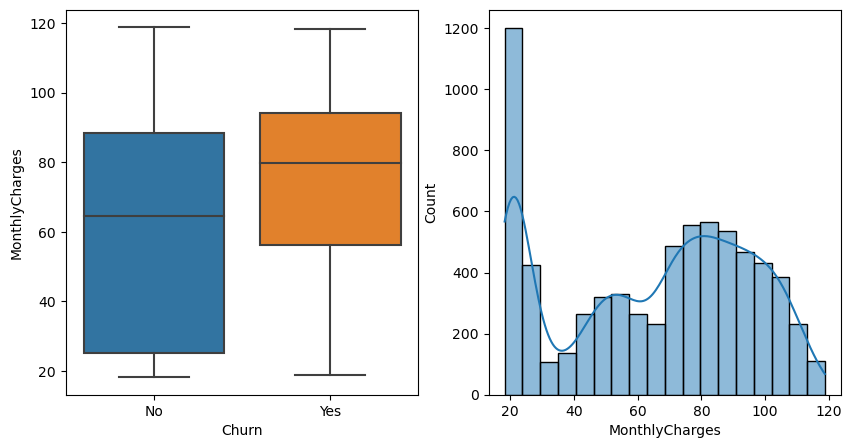

In [35]:
plot_num('MonthlyCharges')

#### Insights:
High churn can be seen with high MonthlyCharges.

MonthlyCharges has negative skewness i.e -0.22.

## Result:
HIGH Churn seen in case of Month to month contracts, No online security,No Tech support, First year of subscription and Fibre Optics Internet.


LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years.


Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

In [36]:
# spliting tenure into bins

#creating label for bins
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)] # max of tenure is 72

df['tenure_group']=pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

## Preprocessing

In [37]:
df_copy=df.copy()
# dropping tenure column as we have extracted data from it
df_copy.drop('tenure',axis=1,inplace=True)

### Encoding

In [38]:
cat_col=df_copy.select_dtypes(['object','category']).drop('Churn',axis=1)
cat_col.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1-12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,25-36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1-12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),37-48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1-12


In [39]:
le=LabelEncoder()

for i in cat_col.columns:
    df_copy[i]=le.fit_transform(df_copy[i])
    
df_copy['Churn'].replace({'No':0,'Yes':1},inplace=True)

In [40]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0


### Feature selection
Chi square test

In [41]:
features=df_copy.loc[:,cat_col.columns]
target=df_copy['Churn']

select=SelectKBest(score_func = chi2,k = 'all')
best_feature=select.fit(features,target)

<AxesSubplot:>

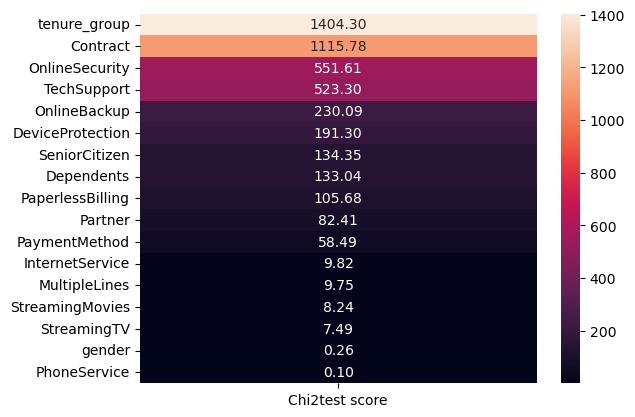

In [42]:
featureScores=pd.DataFrame(index=cat_col.columns,data=best_feature.scores_,columns=['Chi2test score'])
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi2test score'),annot = True,fmt = '0.2f')

We can see that tenure_group, contract, Online Security and TechSupport are most important features.

Also gender and PhoneService don't have any impact on target variable.

In [43]:
#one hot encoding for categorical columns
df_copy=pd.get_dummies(df,columns=cat_col.columns,drop_first=True)

In [44]:
df_copy.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,1,29.85,29.85,No,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,34,56.95,1889.50,No,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,2,53.85,108.15,Yes,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,45,42.30,1840.75,No,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2,70.70,151.65,Yes,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


Data is encoded

### Feature Transformation

In [45]:
def tranform(feature):
    print("Skewness before transformation:",df_copy[feature].skew())
    
    plt.figure(figsize=(10,9))
    plt.subplot(2,2,1)
    t1=np.log1p(df_copy[feature])
    print("log tranformation:",t1.skew())
    sns.histplot(t1,kde=True)
    plt.title("log tranformation")
    
    plt.subplot(2,2,2)
    t2=df_copy[feature]**(1/2)
    print("Squre root transformation:",t2.skew())
    sns.histplot(t2,kde=True)
    plt.title("Squre root tranformation")
    
    plt.subplot(2,2,3)
    t3=1/df_copy[feature]
    print("reciprocal transformation:",t3.skew())
    sns.histplot(t3,kde=True)
    plt.title("reciprocal tranformation")
    
    plt.subplot(2,2,4)
    t4=df_copy[feature]**(1/1.2)
    print("Exponentioal transformation:",t4.skew())
    sns.histplot(t4,kde=True)
    plt.title("Exponentioal tranformation")

Skewness before transformation: -0.22052443394398033
log tranformation: -0.7190167330394875
Squre root transformation: -0.48455701260718537
reciprocal transformation: 1.1079952670465618
Exponentioal transformation: -0.30958718538385827


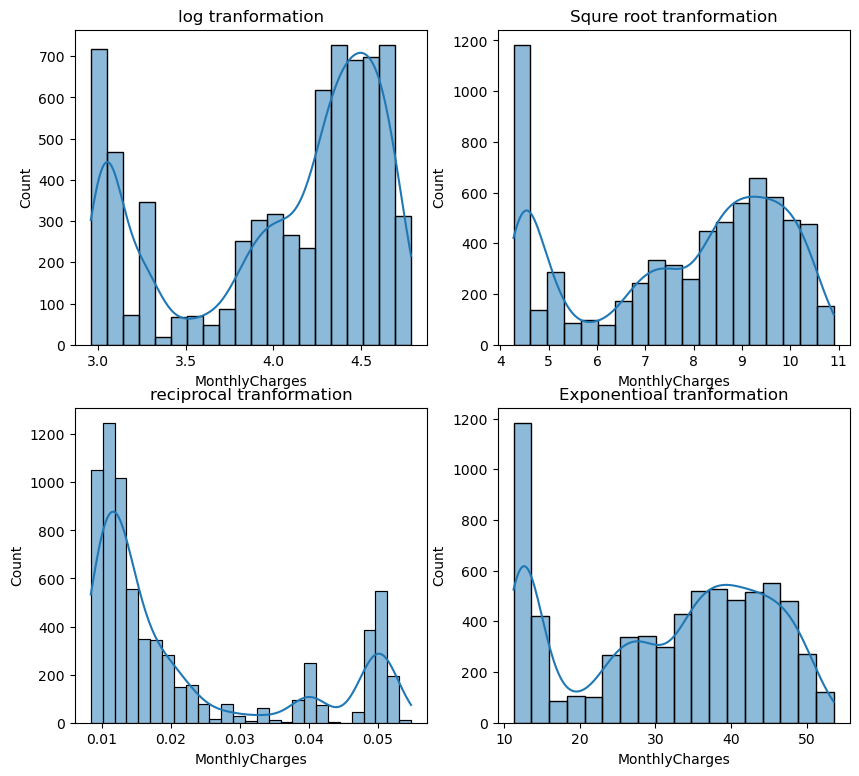

In [46]:
tranform('MonthlyCharges')

 will stick with original values of MonthlyCharges column.

Skewness before transformation: 0.9637890936414893
log tranformation: -0.7445016135460701
Squre root transformation: 0.30983834186805154
reciprocal transformation: 3.77900510103796
Exponentioal transformation: 0.7752980782688179


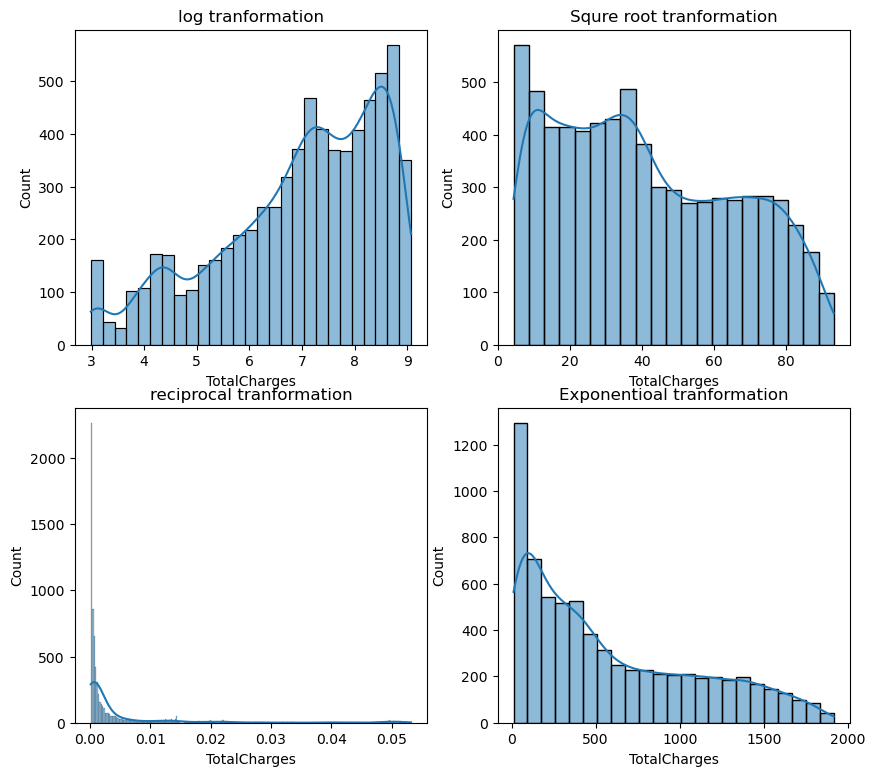

In [47]:
tranform('TotalCharges')

Square root transformation is giving low skewness. I will tranform the data using it.

In [48]:
# applying square root transformation on Totalcharges
df_copy['TotalCharges']=np.sqrt(df_copy["TotalCharges"])

## Splitting data

In [49]:
X=df_copy.drop('Churn',axis=1)
Y=df_copy['Churn']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,stratify=Y)

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5282, 35)
(5282,)
(1761, 35)
(1761,)


## Oversampling

In [52]:
print(y_train.value_counts())

# counts before smote oversampling

No     3880
Yes    1402
Name: Churn, dtype: int64


In [53]:
smote=SMOTE()
x_rec,y_rec=smote.fit_resample(x_train,y_train)

In [54]:
print(y_rec.value_counts())
# counts after smote 

No     3880
Yes    3880
Name: Churn, dtype: int64


Data is balanced

## Feature scaling

In [55]:
sc=StandardScaler()
x_rec=sc.fit_transform(x_rec)
x_test=sc.transform(x_test)

# Model Building

In [56]:
tr=[]
ts=[]
def build_model(model):
    model.fit(x_rec,y_rec)
    y_tr_pred= model.predict(x_rec)
    y_ts_pred=model.predict(x_test)
    train_acc=accuracy_score(y_rec,y_tr_pred)
    test_acc=accuracy_score(y_test,y_ts_pred)
    print("training accuracy:",train_acc)
    print("testing accuracy:",test_acc)
    print(classification_report(y_test,y_ts_pred))  
    tr.append(train_acc)
    ts.append(test_acc)

### Logistic Regression

In [57]:
lr=LogisticRegression()
build_model(lr)

training accuracy: 0.8289948453608248
testing accuracy: 0.7722884724588303
              precision    recall  f1-score   support

          No       0.87      0.81      0.84      1294
         Yes       0.56      0.67      0.61       467

    accuracy                           0.77      1761
   macro avg       0.72      0.74      0.72      1761
weighted avg       0.79      0.77      0.78      1761



### Desicion Tree

In [58]:
dtc=DecisionTreeClassifier()
build_model(dtc)

training accuracy: 0.9980670103092784
testing accuracy: 0.7257240204429302
              precision    recall  f1-score   support

          No       0.82      0.80      0.81      1294
         Yes       0.48      0.52      0.50       467

    accuracy                           0.73      1761
   macro avg       0.65      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761



### Random Forest Classifier

In [59]:
rfc=RandomForestClassifier()
build_model(rfc)

training accuracy: 0.9980670103092784
testing accuracy: 0.7791027825099376
              precision    recall  f1-score   support

          No       0.85      0.85      0.85      1294
         Yes       0.58      0.60      0.59       467

    accuracy                           0.78      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.78      0.78      0.78      1761



### Adaboost

In [60]:
adc=AdaBoostClassifier(n_estimators=50,learning_rate=1.0,algorithm='SAMME.R')
build_model(adc)

training accuracy: 0.8212628865979381
testing accuracy: 0.7438955139125497
              precision    recall  f1-score   support

          No       0.88      0.75      0.81      1294
         Yes       0.51      0.73      0.60       467

    accuracy                           0.74      1761
   macro avg       0.70      0.74      0.71      1761
weighted avg       0.79      0.74      0.76      1761



### Gridient boosting

In [61]:
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
build_model(gbc)

training accuracy: 0.8444587628865979
testing accuracy: 0.7569562748438388
              precision    recall  f1-score   support

          No       0.87      0.79      0.83      1294
         Yes       0.53      0.67      0.60       467

    accuracy                           0.76      1761
   macro avg       0.70      0.73      0.71      1761
weighted avg       0.78      0.76      0.77      1761



### Performance

In [62]:
algo=['LogisticRegression','DecisionTreeClassifier',',RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier']

performance=pd.DataFrame(
{
   'algorithm':algo,
    'training accuracy':tr,
    'testing accuracy':ts
})

<AxesSubplot:xlabel='algorithm'>

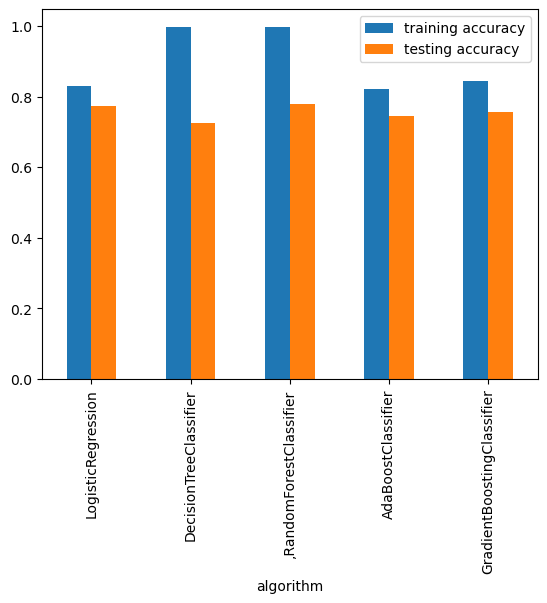

In [63]:
performance.plot(x='algorithm',y=['training accuracy','testing accuracy'],kind='bar')

### Insights:
Logistic regression is performing well but it has low recall score.

Decision tree and Random forest are overfitting. we need to tune the parameters.

## Conclusion:
Random forest is performing well by considering tunned parameters. Also it is giving good recall score.

We can also consider Adaboost as it is performing well in both training and testing with good recall score.